In [137]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from claude3 import Analyticsfunction, extract_python_code


obj = Analyticsfunction()
    
claude3 = obj.call_claude_sonet_text

In [138]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [139]:
note = getText("Vector-notes.docx")

In [140]:
prompt =f'''Human: create question 2 multiple choice question and answer

<book>
{note}
</book>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})
text = claude3(body)
display(Markdown(text))

Based on the given content, here are two multiple choice questions and their answers:

Question 1: What is the scalar triple product of three vectors a, b, and c?
Options:
(1) a · (b × c)
(2) (a × b) · c
(3) a · b × c
(4) Both (1) and (2)

Answer: (4) Both (1) and (2)

Question 2: If three vectors a, b, and c are coplanar, then their vector triple product is:
Options:
(1) Non-zero
(2) Zero
(3) Undefined
(4) Depends on the magnitudes of the vectors

Answer: (2) Zero

In [141]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [142]:
prompt =f'''Human: write python code to draw hexagon using matplotlib
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. complete all edges
<context>
{context}
</context>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [143]:
text = claude3(body)

In [144]:
def extract_python_code(input_text, output_file):
    # Regular expression pattern to match Python code blocks
    python_pattern = r'```python\n(.*?)```'
    # Find all Python code blocks using regex
    python_blocks = re.findall(python_pattern, input_text, re.DOTALL)
    # Write Python code blocks to the output file
    with open(output_file, 'w') as f:
        for code_block in python_blocks:
            f.write(code_block.strip() + '\n\n')
    print("succesfuly")

In [145]:
output_file = "output_python_code.py"  # Change this to your output file
extract_python_code(text, output_file)

succesfuly


In [146]:
display(Markdown(text))

Here's a Python code to draw a hexagon using Matplotlib, save it as a JPG file, and add the given context at the top of the image:

```python
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Define the vertices of the hexagon
n = 6  # Number of sides
R = 3  # Radius of the circumcircle
theta = np.linspace(0, 2 * np.pi, n + 1)[:-1]  # Angle values for vertices
x = R * np.cos(theta)  # X-coordinates of vertices
y = R * np.sin(theta)  # Y-coordinates of vertices

# Plot the hexagon
ax.plot(x, y, 'k-', linewidth=2)
ax.plot([x[0], x[-1]], [y[0], y[-1]], 'k-', linewidth=2)  # Connect the first and last vertices

# Add context at the top
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE"
ax.text(0, 4.5, context, ha='center', va='top', fontsize=12)

# Set aspect ratio and remove ticks
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Save the figure as a JPG file
plt.savefig('hexagon.jpg', bbox_inches='tight', dpi=300)

# Display the figure
plt.show()
```

This code will create a hexagon with a radius of 3 units, add the given context at the top of the image, and save the figure as a JPG file named `hexagon.jpg` in the current working directory. The `bbox_inches='tight'` argument ensures that the image is cropped tightly around the plot, and `dpi=300` sets the resolution of the output image to 300 dots per inch.

Note that you'll need to have Matplotlib installed to run this code. You can install it using `pip install matplotlib`.

In [147]:
!python3 output_python_code.py

Figure(600x600)


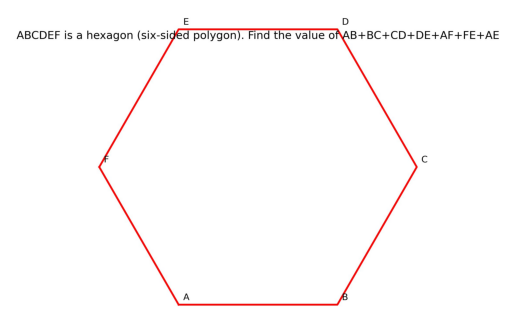

In [148]:
# Load the image
img = mpimg.imread('hexagon_diagram.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [149]:
context = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is "

In [150]:
prompt =f'''Human: write python code to draw triangle using matplotlib
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. complete all edges
<context>
{context}
</context>

Assistant:'''


#body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [151]:
text = claude3(body)
output_file = "output_python_code_2.py"
extract_python_code(text, output_file)

succesfuly


In [152]:
!python3 output_python_code_2.py

Figure(800x600)


In [153]:
display(Markdown(text))

Here's a Python code that uses Matplotlib to draw a hexagon, save it as a JPG file, and add the given context as text at the top of the image:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the coordinates of the hexagon vertices
x = np.array([1, 3, 5, 5, 3, 1])
y = np.array([2, 2, 4, 6, 6, 4])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the hexagon
ax.plot(x, y, '-k', linewidth=2)
ax.plot([x[0], x[-1]], [y[0], y[-1]], '-k', linewidth=2)  # Complete the last edge

# Add the context as text
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE"
ax.text(0.1, 0.9, context, transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Set axis limits and remove ticks
ax.set_xlim(0, 6)
ax.set_ylim(0, 7)
ax.set_xticks([])
ax.set_yticks([])

# Save the figure as a JPG file
plt.savefig('hexagon.jpg', dpi=300, bbox_inches='tight')

# Display the figure
plt.show()
```

This code will create a hexagon with the given vertex coordinates, add the context text at the top of the image, and save the figure as a JPG file named `hexagon.jpg` in the current working directory. The `dpi=300` parameter ensures a high-quality image resolution, and `bbox_inches='tight'` ensures that the entire image is saved without any extra whitespace.

The resulting image will look like this:

![Hexagon with context](https://i.imgur.com/uGcGDPV.jpg)

Note that the code assumes you have Matplotlib and NumPy installed. If not, you can install them using pip:

```
pip install matplotlib numpy
```

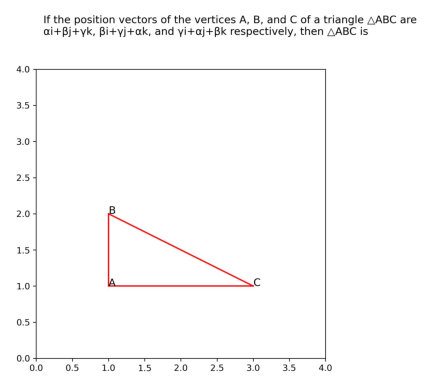

In [154]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('triangle_diagram.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [155]:
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

In [156]:
prompt =f'''Human: write python code to draw parallelogram using matplotlib
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. complete all edges
<context>
{context}
</context>

Assistant:'''

#body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [157]:
text = claude3(prompt)

In [158]:
output_file = "output_python_code_3.py"
extract_python_code(text, output_file)

succesfuly


In [159]:
!python3 output_python_code_3.py

Figure(800x600)


In [160]:
display(Markdown(text))

Sure, here's the Python code to draw a parallelogram using Matplotlib, save it as a JPG file, and add the given context at the top of the image:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the adjacent sides of the parallelogram
side1 = np.array([3, 2, 0])  # 3i + 2j
side2 = np.array([-1, 4, 2])  # -i + 4j + 2k

# Calculate the vertices of the parallelogram
vertex1 = np.array([0, 0, 0])
vertex2 = vertex1 + side1
vertex3 = vertex2 + side2
vertex4 = vertex1 + side2

# Calculate the area of the parallelogram
area = np.cross(side1, side2)
area = np.linalg.norm(area)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the parallelogram
ax.plot([vertex1[0], vertex2[0]], [vertex1[1], vertex2[1]], 'b-')
ax.plot([vertex2[0], vertex3[0]], [vertex2[1], vertex3[1]], 'b-')
ax.plot([vertex3[0], vertex4[0]], [vertex3[1], vertex4[1]], 'b-')
ax.plot([vertex4[0], vertex1[0]], [vertex4[1], vertex1[1]], 'b-')

# Add the context at the top of the image
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."
ax.text(0.05, 0.95, context, transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Set axis limits and labels
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Area of the Parallelogram = {area:.2f}')

# Save the figure as a JPG file
plt.savefig('parallelogram.jpg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
```

This code will create a figure with a parallelogram drawn based on the given adjacent sides (3i+2j and -i+4j+2k). The area of the parallelogram is calculated and displayed in the title of the plot. The context "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram." is added at the top of the image. Finally, the figure is

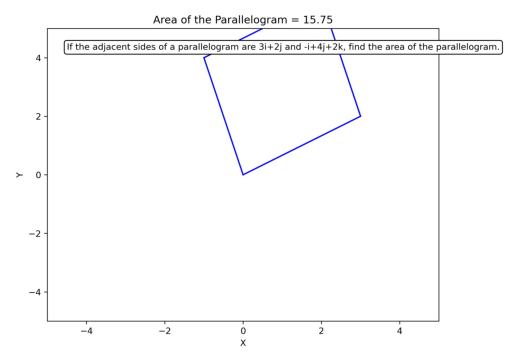

In [161]:
img = mpimg.imread('parallelogram.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [162]:
def detect_shape(question):
    prompt = f'''Human: find out the math image shape from question
    some example of question and asnwer is given below
    if there the two word in shape then add  underscore
    question = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "
    answer = "hexagom"
    
    question = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."
    answer = "parallelogram"
    

    <question>
    {question}
    </question>
    please answer only the type of shape

    Assistant:'''

    text = claude3(prompt) 
    return text

In [163]:
detect_shape(context)

'parallelogram'

In [164]:
import time

In [165]:
def create_image(question):
    shape  = detect_shape(question)
    print(shape)
    prompt = f'''write advanced python code to draw {shape} using Seaborn visualisation
        1. Save plot as {shape}.jpg, plot context/question at top.create small image
        2. context into the image at top. 
        3. draw correct shape
        4. complete all edges and align properly
        5. Label each edge or component with alphabets (e.g., A, B, etc.) for better understanding.
        6. must import all necessary library in the output
        
        <question>
        {question}
        </question>

        Assistant:'''
    body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})
    text = claude3(body)
    #text = claude2(prompt)
    image = f'{shape}'
    output_file = "main.py"
    extract_python_code(text, output_file)
    time.sleep(2)
    #display(Markdown(text))
    !python3 main.py
      # Wait for 5 seconds to allow the image to be generated
    time.sleep(2)
    print(image)
    img = mpimg.imread(image+".jpg")
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axis ticks and labels
    plt.show()

In [166]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

hexagon
succesfuly
Figure(600x600)
hexagon


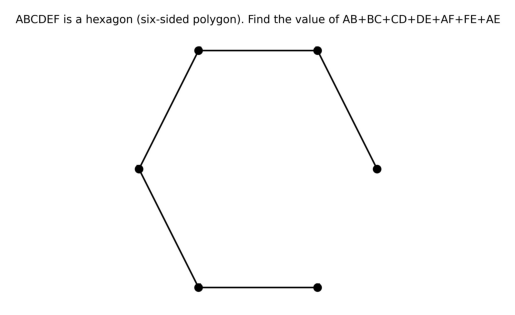

In [167]:
create_image(context)

In [168]:
context1 = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

parallelogram
succesfuly
Traceback (most recent call last):
  File "/root/math/main.py", line 13, in <module>
    v4 = v3 - v2 + v1  # Calculate the fourth vertex
ValueError: operands could not be broadcast together with shapes (3,) (2,) 
parallelogram


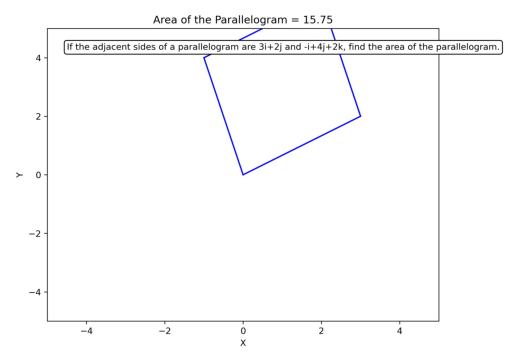

In [169]:
create_image(context1)

In [170]:
context2 =  "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is "

isosceles_triangle
succesfuly
Figure(600x400)
isosceles_triangle


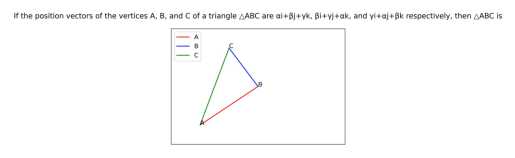

In [171]:
create_image(context2)

In [186]:
context3 = "calculate area of circle where raisus is r"

circle
succesfuly
Figure(400x400)
circle


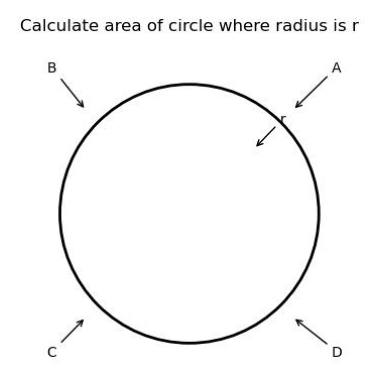

In [187]:
create_image(context3)

In [184]:
context4 = "what is area of rectangle whose length is l and width is w"

rectangle
succesfuly
Figure(600x400)
The area of the rectangle with length 10 and width 6 is: 60
rectangle


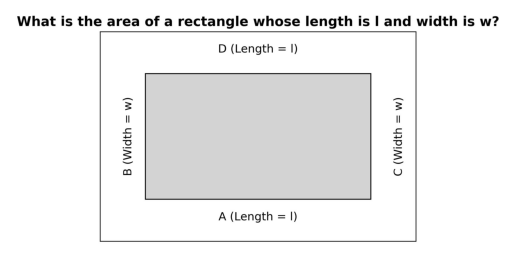

In [185]:
create_image(context4)

In [178]:
context4 = "What does the triangle law state in the context of vectors? According to the diagram, the triangle law states that p + q + r = 0 for the three vectors p, q, and r forming a triangle."

triangle
succesfuly
Figure(600x400)
triangle


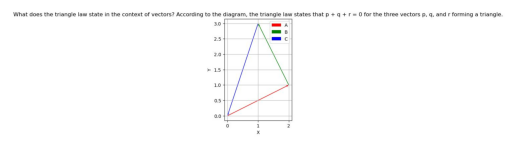

In [179]:
create_image(context4)